In [2]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


In [3]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_transform_cat_to_num.csv"


In [4]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

BP1_1,BP1_20,BP1_23,BP1_30,BP1_33,BP1_34,BP1_35,BP1_4,BP1_5,BPCOD,ESTRATO,BP1_3C
0.2620636,0.8978031,0.3785798,0.9425265,0.6669282,2.000000e-04,0.0000000,0.6208317,0.8673990,0.2956061,0.8256179,0.7269517
0.1453511,0.8978031,0.8656336,0.9425265,0.6669282,3.000000e-05,0.0000000,0.6208317,0.8673990,0.2956061,0.8256179,0.7269517
0.2620636,0.8978031,0.9154570,0.9425265,0.6669282,5.000001e-05,0.0000000,0.9642997,0.3993723,0.2956061,0.4525304,0.7269517
0.1453511,0.8978031,0.7997254,0.9425265,0.6669282,5.000001e-04,0.0000000,0.6208317,0.8673990,0.2956061,0.4525304,0.7269517
0.5235386,0.8978031,0.3785798,0.9425265,0.6669282,1.500000e-04,0.0000000,0.3134563,0.3993723,0.2956061,0.4525304,0.7269517
1.0000000,0.8978031,0.3785798,0.9425265,0.8575912,4.811678e-01,0.3000704,0.3134563,0.7161632,0.7630443,0.8256179,0.7269517


In [5]:
ncol(data)

[1] 12

In [8]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data,iter.max = 50,
                          centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [9]:
max(dunn_kmeans)

[1] 0.03344014

Saving 7 x 7 in image


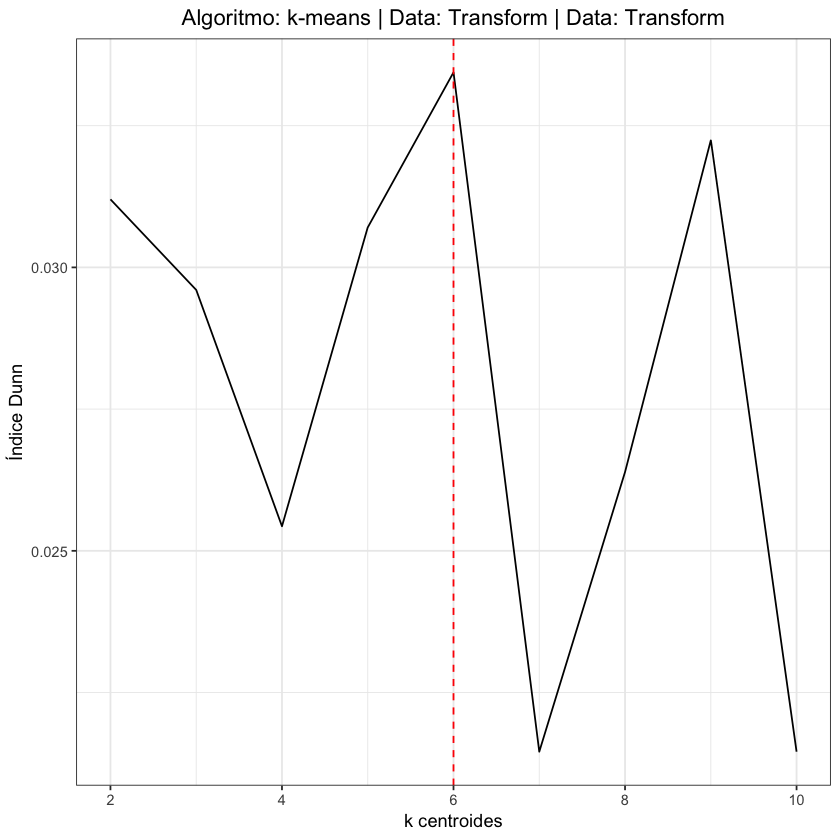

In [10]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Data: Transform | Data: Transform', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/envipe/dunn_euclidean_encoding.png", dpi = 300)
    

In [12]:
kmeans <- stats::kmeans(x = data, iter.max = 50,
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


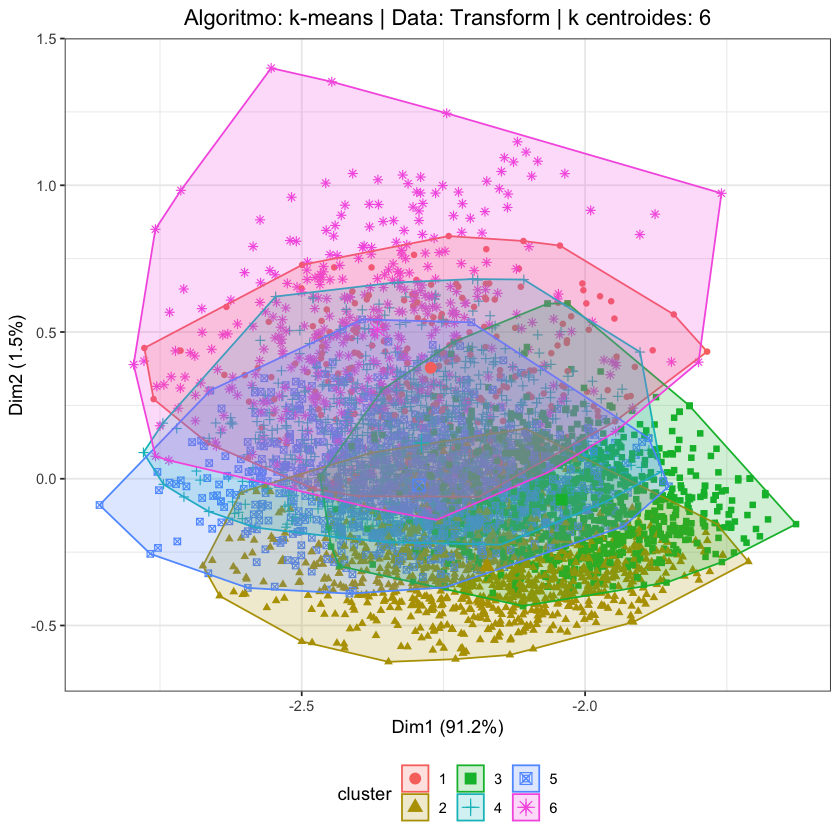

In [13]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Transform | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/envipe/kmeans_transform.png", 
       dpi = 300)

In [14]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_transform_cluster.csv"


In [15]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
